<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import matplotlib as plt
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 30})

In [3]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [4]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h1>Dependencies over time</h1>

In [5]:
print(plots.plot_time_delayed_dependencies.__doc__)


    Plot the similarities for different similarity measures between a reference series and the map delayed by different time steps.

    Before computing the similarity, the map is shifted by a given index and the reference series stays unchanged.

    The results are made comparable using the scaling_func. The results of Pearson's Correlation stay unscaled.


    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        time_shifts (array): List of integers that indicate by how many time units the map should be shifted
        measures (list): List of similarity measures to compute similarity between two time series
        measure_labels (list): List of labels for the measures
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of

In [6]:
measures = [sim.pearson_correlation_abs, sim.mutual_information]

In [7]:
labels = ["Absolute Pearson's Correlation", "Mutual Information"]

In [8]:
time_shifts_in_months = [0, 1, 3, 6, 12]

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:726: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


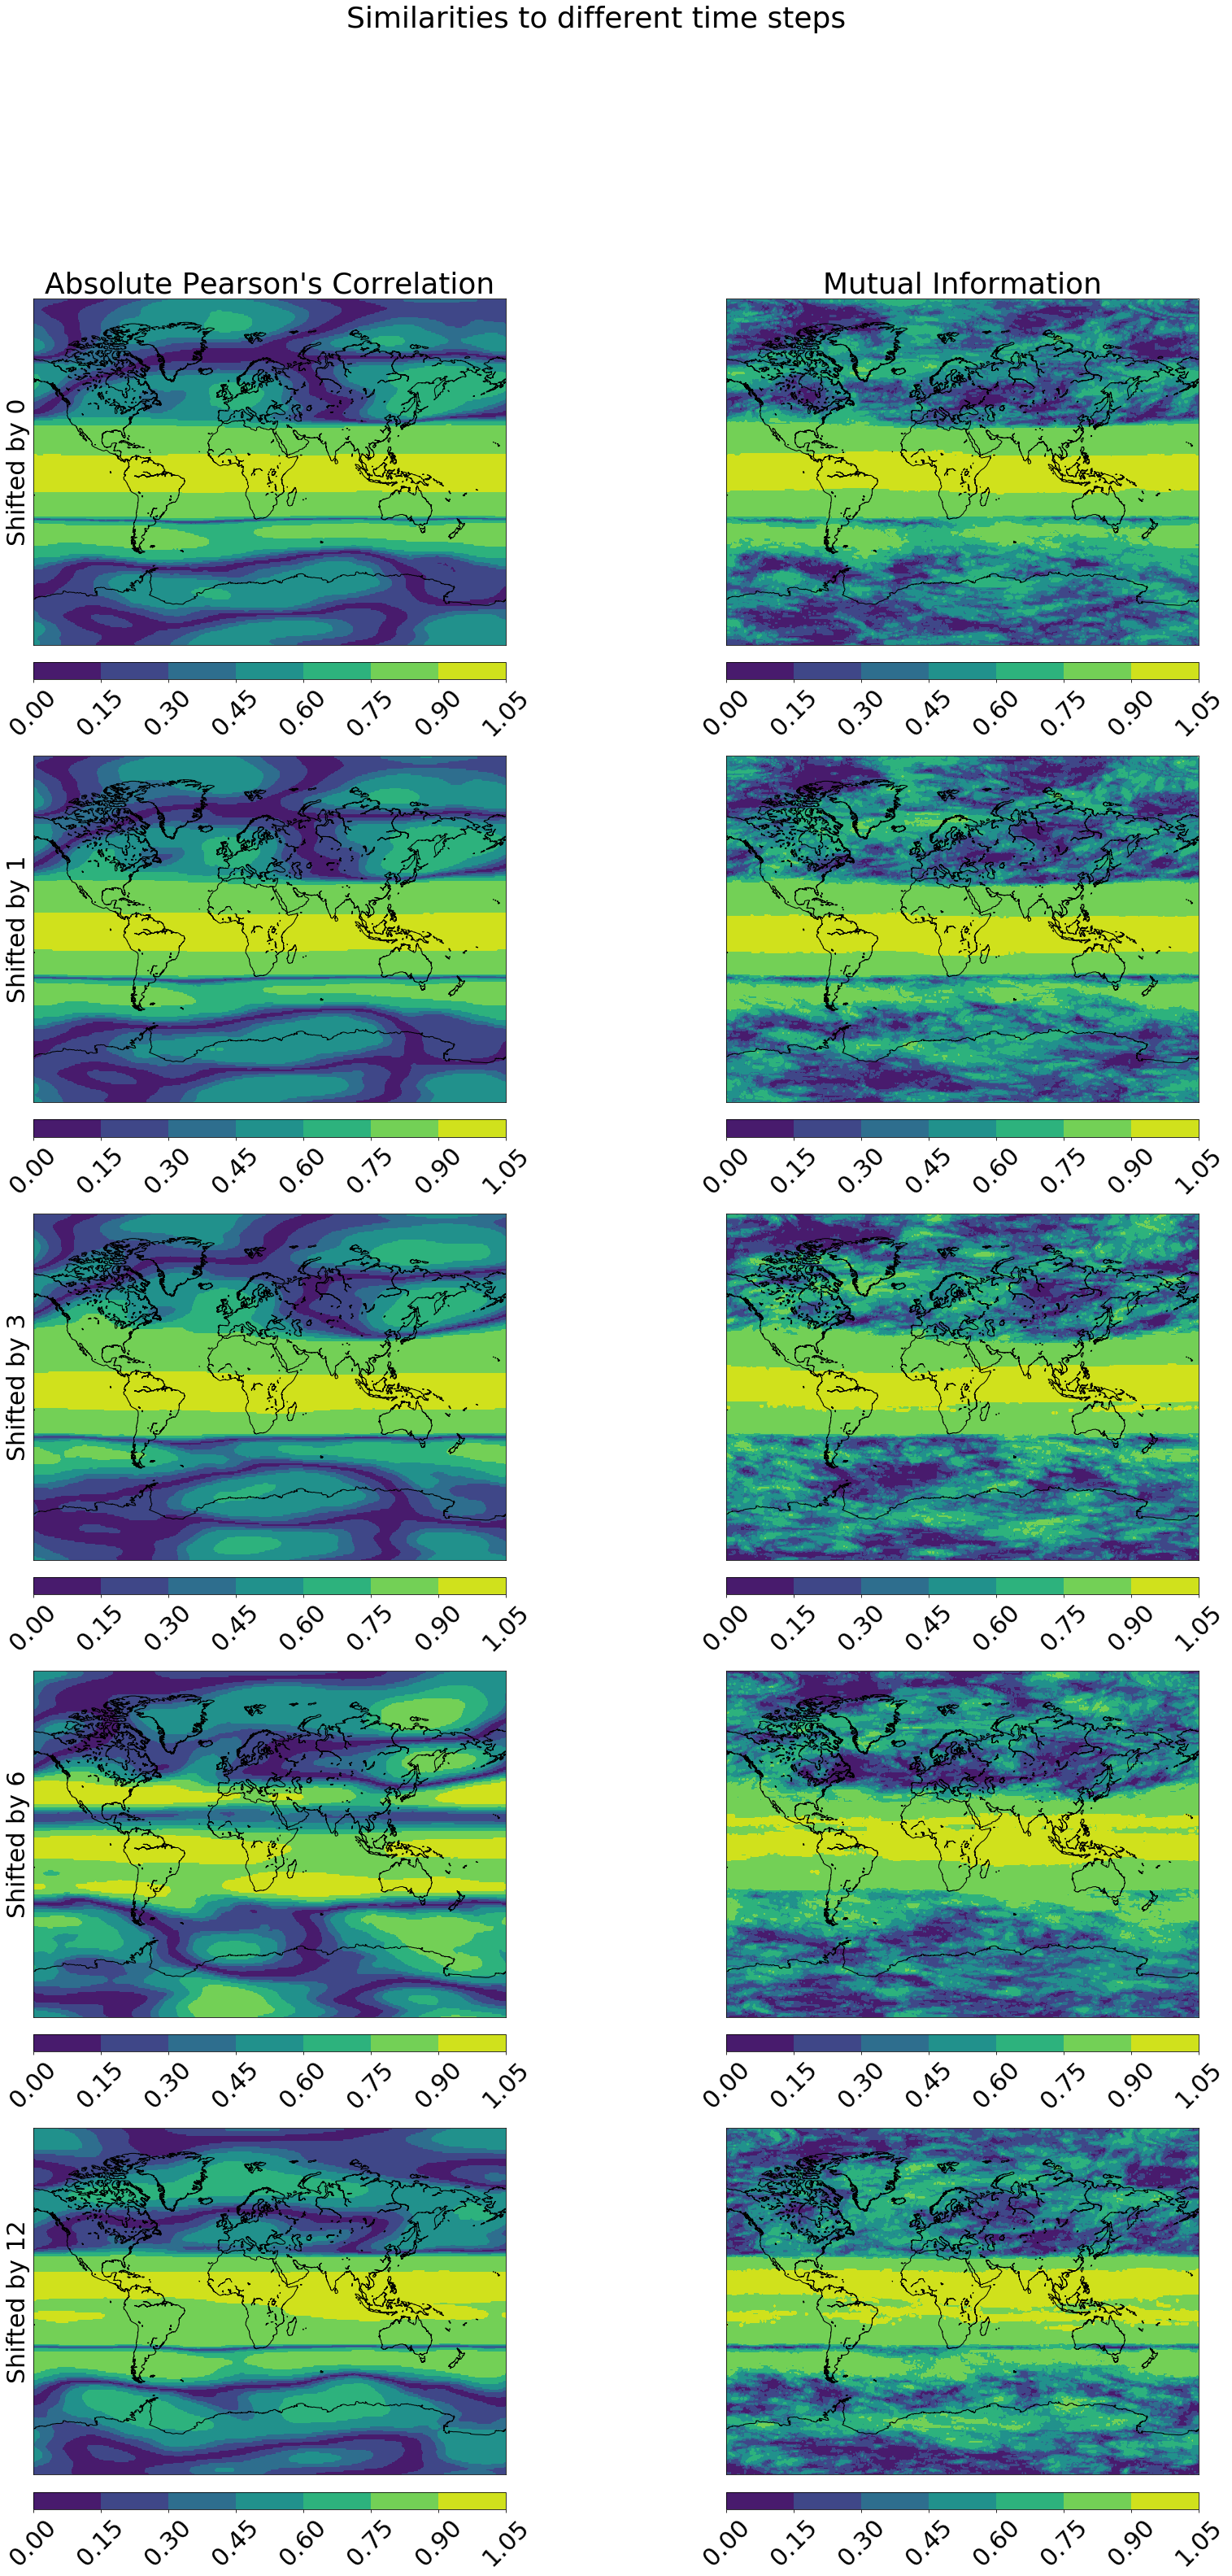

In [9]:
plots.plot_time_delayed_dependencies(u_l30, qbo_equator, time_shifts_in_months, measures, labels)